**PRELIMINARY ANALYSIS STEPS**

**1) IMPORT NECESSARY LIBRARY**

In [1]:
pip install scikeras

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.utils import to_categorical

**2) IMPORT COLLIN DATASET**

In [3]:
# Read Excel file
data = pd.read_excel('project_dsp.xlsx')
#first few rows of the dataset to understand its structure and contents.
data.head(20)


,Category,Customer,Section,Date,PassID,Name,ModelID,Model,JobNumber,SerielNumber,OperationNumber,ProcessID,Process,Quantity,RejectStatus,Reject,NCCode,NCDescription,Pass
0,GULL,Celestica Valencia S.A,COLLINS,2019-03-29,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,1,X3961-K,2439375,CF0531-K To CF0560-K,2,2,SOLDER,30,YES,2,3e,Bobbin damaged during process.,28
1,GULL,Celestica Valencia S.A,COLLINS,2019-04-01,A4206,NATASHA NABILA BINTI AZLI,1,X3961-K,2439375,CF0531-K To CF0560-K,11,11,FINAL INSPECTION,30,YES,1,15e,DC resistCGce fail,29
2,GULL,Celestica Valencia S.A,COLLINS,2019-04-02,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,1,X3961-K,2439375,CF0531-K To CF0560-K,2,2,SOLDER,30,YES,1,3n,Broken lead-out,29
3,GULL,Celestica Valencia S.A,COLLINS,2019-04-03,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,1,X3961-K,2439375,CF0531-K To CF0560-K,2,2,SOLDER,30,YES,1,3e,Bobbin damaged during process.,29
4,GULL,Celestica Valencia S.A,COLLINS,2019-04-04,A4281,NURUL HIDAYAH BINTI MOHD HANAFIAH,1,X3961-K,2439442,CF0471-K To CF0530-K,2,2,SOLDER,60,YES,1,3e,Bobbin damaged during process.,59
5,GULL,Celestica Valencia S.A,COLLINS,2019-04-05,A4206,NATASHA NABILA BINTI AZLI,1,X3961-K,2439442,CF0471-K To CF0530-K,4,4,TEST AFTER SOLDER,60,YES,2,15e,DC resistCGce fail,58
6,GULL,Celestica Valencia S.A,COLLINS,2019-04-08,A4337,NUR AMIRA BINTI NAWAI,1,X3961-K,2439442,CF0471-K To CF0530-K,4,4,TEST AFTER SOLDER,60,YES,2,15l,Polarity/Phasing fail,58
7,GULL,Celestica Valencia S.A,COLLINS,2019-04-09,A4281,NURUL HIDAYAH BINTI MOHD HANAFIAH,2,X4419-K,10000332,CG1041-K To CG1043-K,13,25,OQA,3,YES,1,1g,blobby' joint,2
8,GULL,Celestica Valencia S.A,COLLINS,2019-04-10,A4206,NATASHA NABILA BINTI AZLI,3,X4420-K,2451764,CH1013-K To CH1082-K,11,36,FINAL TEST,70,YES,3,15a,InductCGce hi/lo,67
9,GULL,Celestica Valencia S.A,COLLINS,2019-04-11,S1942,NOOR SUE AFFIEZA BINTI SHA'ARI,3,X4420-K,2451764,CH1013-K To CH1082-K,13,38,OQA,70,YES,2,3l,Aesthetically incorrect,68


In [4]:
data.tail(20)

,Category,Customer,Section,Date,PassID,Name,ModelID,Model,JobNumber,SerielNumber,OperationNumber,ProcessID,Process,Quantity,RejectStatus,Reject,NCCode,NCDescription,Pass
1214,GULL,Celestica Valencia S.A,COLLINS,2024-03-04,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,4,X4421-K,2527881,CH1473-K To CH1482-K,13,25,OQA,10,YES,1,3b,Enamel damage,9
1215,GULL,Celestica Valencia S.A,COLLINS,2024-03-05,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,4,X4421-K,2527949,CH1483-K To CH1492-K,13,25,OQA,10,YES,1,3b,Enamel damage,9
1216,GULL,Celestica Valencia S.A,COLLINS,2024-03-06,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,2,X4419-K,2527953,CH1493-K To CH1502-K,13,25,OQA,10,YES,1,3l,Aesthetically incorrect,9
1217,GULL,Celestica Valencia S.A,COLLINS,2024-03-07,A4281,NURUL HIDAYAH BINTI MOHD HANAFIAH,2,X4419-K,2527878,CH1503-K To CH1512-K,13,25,OQA,10,YES,1,3l,Aesthetically incorrect,9
1218,GULL,Celestica Valencia S.A,COLLINS,2024-03-08,A4206,NATASHA NABILA BINTI AZLI,2,X4419-K,2527879,CH1513-K To CH1522-K,12,24,FINAL INSPECTION,5,YES,1,3n,Broken lead-out,4
1219,GULL,Celestica Valencia S.A,COLLINS,2024-03-11,A4281,NURUL HIDAYAH BINTI MOHD HANAFIAH,2,X4419-K,2527880,CH1523-K To CH1532-K,12,24,FINAL INSPECTION,10,YES,1,1g,blobby' joint,9
1220,GULL,Celestica Valencia S.A,COLLINS,2024-03-12,A4206,NATASHA NABILA BINTI AZLI,2,X4419-K,2527881,CH1533-K To CH1542-K,12,24,FINAL INSPECTION,10,YES,1,3b,Enamel damage,9
1221,GULL,Celestica Valencia S.A,COLLINS,2024-03-13,S1942,NOOR SUE AFFIEZA BINTI SHA'ARI,2,X4419-K,2536429,CH1543-K To CH1552-K,12,24,FINAL INSPECTION,10,YES,1,1g,blobby' joint,9
1222,GULL,Celestica Valencia S.A,COLLINS,2024-03-14,A4337,NUR AMIRA BINTI NAWAI,2,X4419-K,2536430,CH1553-K To CH1562-K,12,24,FINAL INSPECTION,10,YES,1,3l,Aesthetically incorrect,9
1223,GULL,Celestica Valencia S.A,COLLINS,2024-03-15,A4281,NURUL HIDAYAH BINTI MOHD HANAFIAH,2,X4419-K,2536431,CH1563-K To CH1572-K,12,24,FINAL INSPECTION,10,YES,2,3l,Aesthetically incorrect,8


**We can see roughly from the datase that starts collecting from 29 March 2019 until 29 March 2024. The dataset collect for 6 years.**

In [5]:
#Check the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Category         1234 non-null   object        
 1   Customer         1234 non-null   object        
 2   Section          1234 non-null   object        
 3   Date             1234 non-null   datetime64[ns]
 4   PassID           1234 non-null   object        
 5   Name             1234 non-null   object        
 6   ModelID          1234 non-null   int64         
 7   Model            1234 non-null   object        
 8   JobNumber        1234 non-null   object        
 9   SerielNumber     1234 non-null   object        
 10  OperationNumber  1234 non-null   int64         
 11  ProcessID        1234 non-null   int64         
 12  Process          1234 non-null   object        
 13  Quantity         1234 non-null   int64         
 14  RejectStatus     1234 non-null   object 

In [6]:
#check the total rows and columns
data.shape

(1234, 19)

**3) DATA CLEANING**

**- check for missing value and duplicates**

In [7]:
# Check for null data
data.isnull().sum()

Category             0
Customer             0
Section              0
Date                 0
PassID               0
Name                 0
ModelID              0
Model                0
JobNumber            0
SerielNumber         0
OperationNumber      0
ProcessID            0
Process              0
Quantity             0
RejectStatus         0
Reject               0
NCCode             323
NCDescription      323
Pass                 0
dtype: int64

In [8]:
#check which data is missing
data[pd.isnull(data).any(axis=1)]

,Category,Customer,Section,Date,PassID,Name,ModelID,Model,JobNumber,SerielNumber,OperationNumber,ProcessID,Process,Quantity,RejectStatus,Reject,NCCode,NCDescription,Pass
10,GULL,Celestica Valencia S.A,COLLINS,2019-04-12,A4337,NUR AMIRA BINTI NAWAI,3,X4420-K,2458851,CH1418-K To CH1457-K,3,28,SOLDER,40,NO,0,NaN,NaN,40
11,GULL,Celestica Valencia S.A,COLLINS,2019-04-15,A4281,NURUL HIDAYAH BINTI MOHD HANAFIAH,3,X4420-K,2493096,CH1458-K To CH1507-K,11,36,FINAL TEST,50,NO,0,NaN,NaN,50
26,GULL,Celestica Valencia S.A,COLLINS,2019-05-06,A4337,NUR AMIRA BINTI NAWAI,3,X4420-K,2399301,CH0641-K To CH0660-K,2,27,WINDING,20,NO,0,NaN,NaN,20
27,GULL,Celestica Valencia S.A,COLLINS,2019-05-07,A4206,NATASHA NABILA BINTI AZLI,3,X4420-K,2421638,CH0721-K To CH0730-K,3,28,SOLDER,10,NO,0,NaN,NaN,10
28,GULL,Celestica Valencia S.A,COLLINS,2019-05-08,A4206,NATASHA NABILA BINTI AZLI,3,X4420-K,2400888,CH0791-K To CH0800-K,4,29,CURE,10,NO,0,NaN,NaN,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,GULL,Celestica Valencia S.A,COLLINS,2023-12-27,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,2,X4419-K,2366087,CH1016-K To CH1025-K,12,37,FINAL INSPECTION,10,NO,0,NaN,NaN,10
1171,GULL,Celestica Valencia S.A,COLLINS,2024-01-03,A4206,NATASHA NABILA BINTI AZLI,3,X4420-K,2366092,CH1066-K To CH1075-K,5,43,TEST AFTER SOLDER,10,NO,0,NaN,NaN,10
1178,GULL,Celestica Valencia S.A,COLLINS,2024-01-12,A4337,NUR AMIRA BINTI NAWAI,2,X4419-K,2424501,CH1136-K To CH1145-K,11,49,FINAL TEST,10,NO,0,NaN,NaN,10
1204,GULL,Celestica Valencia S.A,COLLINS,2024-02-19,A4221,NUR AMALINA EZLIN BINTI ABDUL SAARI,2,X4419-K,2493100,CH1380-K To CH1389-K,2,40,WINDING,10,NO,0,NaN,NaN,10


There is no missing values except for 'NCCode', and 'NCDescription' variables. This two variables cannot be drop since it is usefull variable, then will be replace with Mode Imputation. In this case, Missing at Random (MAR).

In [9]:
#handle missing value for NCCode and NCDescription with mode
data['NCCode'] = data['NCCode'].fillna(data['NCCode'].mode()[0])
data['NCDescription'] = data['NCDescription'].fillna(data['NCDescription'].mode()[0])

In [10]:
data.isnull().sum()

Category           0
Customer           0
Section            0
Date               0
PassID             0
Name               0
ModelID            0
Model              0
JobNumber          0
SerielNumber       0
OperationNumber    0
ProcessID          0
Process            0
Quantity           0
RejectStatus       0
Reject             0
NCCode             0
NCDescription      0
Pass               0
dtype: int64

In [11]:
#drop irrelevant columns
data.drop(columns=['Category','Customer','Section','PassID','Name','Model','SerielNumber','Process'], inplace=True)

Decided to drop the columns 'Category','Customer','Section','PassID','Name','Model','SerielNumber','Process' from the dataset. These variables are not expected to have a significant impact on other variables and are therefore deemed unnecessary for the analysis.

In [12]:
#first few data after drop variable
data.head()

,Date,ModelID,JobNumber,OperationNumber,ProcessID,Quantity,RejectStatus,Reject,NCCode,NCDescription,Pass
0,2019-03-29,1,2439375,2,2,30,YES,2,3e,Bobbin damaged during process.,28
1,2019-04-01,1,2439375,11,11,30,YES,1,15e,DC resistCGce fail,29
2,2019-04-02,1,2439375,2,2,30,YES,1,3n,Broken lead-out,29
3,2019-04-03,1,2439375,2,2,30,YES,1,3e,Bobbin damaged during process.,29
4,2019-04-04,1,2439442,2,2,60,YES,1,3e,Bobbin damaged during process.,59


In [13]:
data.shape

(1234, 11)

In [14]:
#Check the data types of each column after drop
data.dtypes

Date               datetime64[ns]
ModelID                     int64
JobNumber                  object
OperationNumber             int64
ProcessID                   int64
Quantity                    int64
RejectStatus               object
Reject                      int64
NCCode                     object
NCDescription              object
Pass                        int64
dtype: object

In [15]:
data.isnull().sum()

Date               0
ModelID            0
JobNumber          0
OperationNumber    0
ProcessID          0
Quantity           0
RejectStatus       0
Reject             0
NCCode             0
NCDescription      0
Pass               0
dtype: int64

No missing values after we impute the 'NCCode' and 'NCDescription' variable with Mode.

**- check for duplicates**

In [16]:
#check if there any duplicate rows
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1229    False
1230    False
1231    False
1232    False
1233    False
Length: 1234, dtype: bool

In [17]:
#check for duplicates
data[data.duplicated(keep=False)]

,Date,ModelID,JobNumber,OperationNumber,ProcessID,Quantity,RejectStatus,Reject,NCCode,NCDescription,Pass


There is no null cells and duplicate values detected.

**4) FEATURE ENGINEERING**

In [18]:
#'Date' column available, create it using pd.date_range()
data['Date'] = pd.date_range(start='2019-03-29', periods=len(data), freq='D')

# Convert 'Date' column to datetime if it's not already in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' column as the index
data.set_index('Date', inplace=True)

# Extract month from the index
data['Month'] = data.index.month

# Extract year from the index
data['Year'] = data.index.year

In [19]:
data.head()
data.tail()

,ModelID,JobNumber,OperationNumber,ProcessID,Quantity,RejectStatus,Reject,NCCode,NCDescription,Pass,Month,Year
Date,,,,,,,,,,,,
2022-08-09,2,2543626,13,25,2,YES,1,3n,Broken lead-out,1,8,2022
2022-08-10,2,2543627,13,25,5,YES,1,1g,blobby' joint,4,8,2022
2022-08-11,2,2556759,13,25,10,YES,1,3l,Aesthetically incorrect,9,8,2022
2022-08-12,2,2558175,13,25,10,YES,2,1g,blobby' joint,8,8,2022
2022-08-13,2,2558176,4,16,10,YES,1,15c,Turns ratio fail,9,8,2022


In [20]:
#'Date' change into index and 'Month' become a new feature after extract it from 'Date'
data.columns

Index(['ModelID', 'JobNumber', 'OperationNumber', 'ProcessID', 'Quantity',
       'RejectStatus', 'Reject', 'NCCode', 'NCDescription', 'Pass', 'Month',
       'Year'],
      dtype='object')

In [21]:
data['RejectType'] = data['NCCode'].astype(str) + ' - ' + data['NCDescription'].astype(str)

**New columns to be added which extracting from the 'Date' column, 'Month' and 'Year' variable. New column(RejectType) to be added by combining 'NCCode' and 'NCDescription'.**

In [22]:
#drop irrelevant columns
data.drop(columns=['NCCode','NCDescription'], inplace=True)

**Since we had added the new column ('RejectType') for the combination of 'NCCode' and 'NCDescription', thus we drop it into data2 which is the latest dataset to be used.**

**5) DATA AGGREGRATION**

In [23]:
data2 = data
data2

,ModelID,JobNumber,OperationNumber,ProcessID,Quantity,RejectStatus,Reject,Pass,Month,Year,RejectType
Date,,,,,,,,,,,
2019-03-29,1,2439375,2,2,30,YES,2,28,3,2019,3e - Bobbin damaged during process.
2019-03-30,1,2439375,11,11,30,YES,1,29,3,2019,15e - DC resistCGce fail
2019-03-31,1,2439375,2,2,30,YES,1,29,3,2019,3n - Broken lead-out
2019-04-01,1,2439375,2,2,30,YES,1,29,4,2019,3e - Bobbin damaged during process.
2019-04-02,1,2439442,2,2,60,YES,1,59,4,2019,3e - Bobbin damaged during process.
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-09,2,2543626,13,25,2,YES,1,1,8,2022,3n - Broken lead-out
2022-08-10,2,2543627,13,25,5,YES,1,4,8,2022,1g - blobby' joint
2022-08-11,2,2556759,13,25,10,YES,1,9,8,2022,3l - Aesthetically incorrect


In [24]:
#Aggregated data
#Group by month, model id, RejectType
grouped_data = data2.groupby(['Year','Month', 'ModelID', 'JobNumber', 'RejectType']).agg(
    {
        'Quantity': 'sum',
        'Reject': 'sum',
        'Pass': 'sum'
    }
).reset_index()
grouped_data

,Year,Month,ModelID,JobNumber,RejectType,Quantity,Reject,Pass
0,2019,3,1,2439375,15e - DC resistCGce fail,30,1,29
1,2019,3,1,2439375,3e - Bobbin damaged during process.,30,2,28
2,2019,3,1,2439375,3n - Broken lead-out,30,1,29
3,2019,4,1,2439375,3e - Bobbin damaged during process.,30,1,29
4,2019,4,1,2439442,15e - DC resistCGce fail,60,2,58
...,...,...,...,...,...,...,...,...
1148,2022,8,2,2543626,3n - Broken lead-out,2,1,1
1149,2022,8,2,2543627,1g - blobby' joint,5,1,4
1150,2022,8,2,2556759,3l - Aesthetically incorrect,10,1,9
1151,2022,8,2,2558175,1g - blobby' joint,10,2,8


In [25]:
# Check unique years in the aggregated data
print(grouped_data['Year'].unique())

[2019 2020 2021 2022]


In [26]:
missing_years = set(range(2019, 2025)) - set(grouped_data['Year'].unique())
print("Missing years after aggregation:", missing_years)

Missing years after aggregation: {2024, 2023}


**Due to incomplete data for few laters, 2 years later (2023 and 2024) are not included. Thus, the dataset will undergo 4 years only.**

In [27]:
grouped_data.head(20)

,Year,Month,ModelID,JobNumber,RejectType,Quantity,Reject,Pass
0,2019,3,1,2439375,15e - DC resistCGce fail,30,1,29
1,2019,3,1,2439375,3e - Bobbin damaged during process.,30,2,28
2,2019,3,1,2439375,3n - Broken lead-out,30,1,29
3,2019,4,1,2439375,3e - Bobbin damaged during process.,30,1,29
4,2019,4,1,2439442,15e - DC resistCGce fail,60,2,58
5,2019,4,1,2439442,15l - Polarity/Phasing fail,60,2,58
6,2019,4,1,2439442,3e - Bobbin damaged during process.,60,1,59
7,2019,4,2,2439444,15a - InductCGce hi/lo,100,4,96
8,2019,4,2,2439444,15b - Insulation ResistCGce low,100,2,98
9,2019,4,2,2439444,1g - blobby' joint,100,1,99


In [28]:
grouped_data.dtypes

Year           int32
Month          int32
ModelID        int64
JobNumber     object
RejectType    object
Quantity       int64
Reject         int64
Pass           int64
dtype: object

In [29]:
grouped_data.shape

(1153, 8)

In [30]:
grouped_data.to_csv('gp data.csv', index=False)

**6) EXPLORATORY DATA ANALYSIS (EDA)**

In [31]:
#Summary Statistics
grouped_data.describe()

,Year,Month,ModelID,Quantity,Reject,Pass
count,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000
mean,2020.518647,6.366869,2.130963,67.660017,1.064180,66.595837
std,1.002535,3.287684,0.620277,88.910041,1.098946,88.423920
min,2019.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2020.000000,4.000000,2.000000,10.000000,0.000000,9.000000
50%,2021.000000,6.000000,2.000000,10.000000,1.000000,10.000000
75%,2021.000000,9.000000,2.000000,150.000000,1.000000,148.000000
max,2022.000000,12.000000,4.000000,750.000000,14.000000,742.000000


**I) HISTOGRAM: QUANTITY DISTRIBUTION**

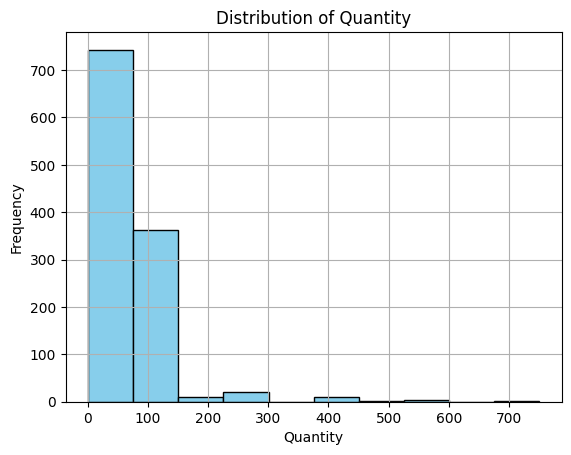

In [32]:
# Plot histogram
plt.hist(grouped_data['Quantity'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.grid(True)
plt.show()

**INTERPRETATION:**
- The distribution represented by the histograms shows the distribution of the quantity variable. The amount ranges from 0 to 700 is shown by the x-axis, and the frequency of batches with quantities handled is shown by the y-axis. All things looked at in the histograms show that batches consisting of about 0-90 quantity are the most common. The distribution is notably right-skewed, suggesting that batches with smaller quantities occur more frequently than batches with greater quantities.
- Reason : High due to customer demand, low due to pandemic.

**II) BARPLOT : REJECT STATUS**

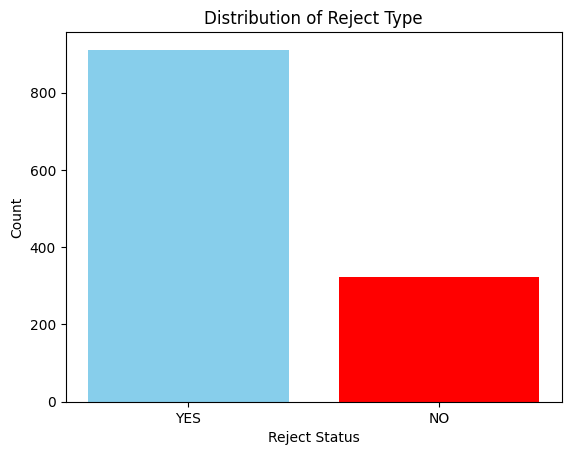

In [33]:
# Count the occurrences of each category
reject_status_counts = data['RejectStatus'].value_counts()

# Plot bar plot
plt.bar(reject_status_counts.index, reject_status_counts.values, color=['skyblue', 'red'])
plt.xlabel('Reject Status')
plt.ylabel('Count')
plt.title('Distribution of Reject Type')
plt.show()

**INTERPRETATION:**
-  With the red bars denoting passed model and the blue bars representing rejected model on the y-axis, the histogram shows the rejection and pass rates of quantities. The heights of the bars that represent "YES" (rejected) and "NO" (passed) can be compared to determine how common rejections are. On the other hand, the "NO" bar denotes a lower pass rate, and the "YES" bar represents a larger rejection rate.
- Reason : High due to low quality material, low due to slightly operator expertise on process that they were doing.

**III) PARETO CHART:Type of reject**

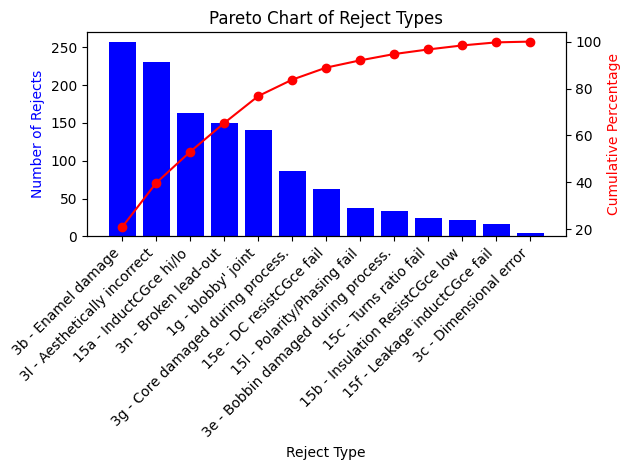

In [34]:
# Calculate total rejects per RejectType
reject_summary = grouped_data.groupby('RejectType')['Reject'].sum().reset_index()

# Sort by total rejects in descending order
reject_summary = reject_summary.sort_values(by='Reject', ascending=False)

# Calculate cumulative frequency and percentage
reject_summary['Cumulative'] = reject_summary['Reject'].cumsum()
reject_summary['CumulativePercentage'] = reject_summary['Cumulative'] / reject_summary['Reject'].sum() * 100

# Plotting
fig, ax = plt.subplots()

# Bar chart for frequencies
bars = ax.bar(reject_summary['RejectType'], reject_summary['Reject'], color='blue')

# Line chart for cumulative percentage
ax2 = ax.twinx()
ax2.plot(reject_summary['RejectType'], reject_summary['CumulativePercentage'], color='red', marker='o')

# Rotate x-axis labels
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')  # Adjusts alignment to the right

# Labels and title
ax.set_xlabel('Reject Type')
ax.set_ylabel('Number of Rejects', color='blue')
ax2.set_ylabel('Cumulative Percentage', color='red')
plt.title('Pareto Chart of Reject Types')

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

**INTERPRETATION:**
- In this case, the type of reject to the total. The x-axis shows different reject types through the combination of the variables "NCCode" and "NCDescription." The highest bar on the left y-axis indicates the most common form of reject. The bar heights on the left y-axis show the number of rejects for each type.
- the most common reject type was taken from the top 80% of the cumulative percentage line chart. By knowing this 80% rule can identify the most common defects that were recorded by these four models. Taken as a whole, the graph shows that the five most common types of defects are ‘3b- Enamel damage’, ‘3l- Aesthetically incorrect’, ‘15a- Inductance hi/lo’, ‘3n- Broken lead-out’, and ‘1g- blobby’ joint’.

**8) STATISTICAL ANALYSIS**

**- time series trend analysis**

In [35]:
from matplotlib import pyplot
from matplotlib.dates import MonthLocator, DateFormatter

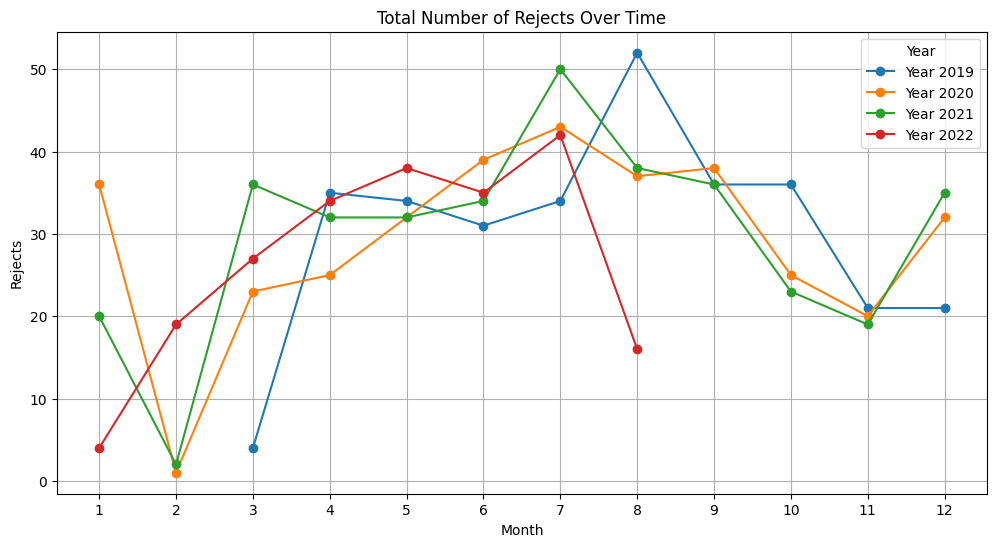

In [36]:
# Group by Year and Month and sum the 'Reject' values
trend_data = grouped_data.groupby(['Year', 'Month'])['Reject'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

# Loop through each year and plot
for year in trend_data['Year'].unique():
    yearly_data = trend_data[trend_data['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['Reject'], label=f'Year {year}', linestyle='-', marker='o')

plt.title('Total Number of Rejects Over Time')
plt.xlabel('Month')
plt.ylabel('Rejects')
plt.grid(True)
plt.xticks(range(1, 13))  # Ensure all months are shown on the x-axis
plt.legend(title='Year')
plt.show()

**`INTERPRETATION:`**
- Throughout the observed period, March 2019, to August 2022 which the time series trend shows a steady increase and decreased in the overall number of rejects over all the 4 years. Reject quantity values of '0' are indicative of cases in which 'RejectStatus' is set to 'N0,' signifying that there are no reject units, 'NCCode,' and 'NCDescription'. This can be a result of an operator lacking the necessary knowledge and experience to carry out the necessary procedures.

**7) LABEL ENCODE, SPLITTING DATA AND SCALING**

**- feature encoding : data transformation (label encoding)**

In [37]:
grouped_data.RejectType.value_counts()

RejectType
3l - Aesthetically incorrect           482
3n - Broken lead-out                   126
3b - Enamel damage                     126
1g - blobby' joint                     115
15a - InductCGce hi/lo                  87
3g - Core damaged during process.       61
15e - DC resistCGce fail                43
3e - Bobbin damaged during process.     31
15l - Polarity/Phasing fail             27
15c - Turns ratio fail                  23
15b - Insulation ResistCGce low         16
15f - Leakage inductCGce fail           12
3c - Dimensional error                   4
Name: count, dtype: int64

In [38]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode column
grouped_data['RejectType'] = label_encoder.fit_transform(grouped_data['RejectType'])

grouped_data.head()

,Year,Month,ModelID,JobNumber,RejectType,Quantity,Reject,Pass
0,2019,3,1,2439375,3,30,1,29
1,2019,3,1,2439375,9,30,2,28
2,2019,3,1,2439375,12,30,1,29
3,2019,4,1,2439375,9,30,1,29
4,2019,4,1,2439442,3,60,2,58


**TO KNOW EACH ENCODED FOR 'RejectType'**

In [39]:
grouped_data.RejectType.value_counts()

RejectType
11    482
12    126
7     126
6     115
0      87
10     61
3      43
9      31
5      27
2      23
1      16
4      12
8       4
Name: count, dtype: int64

**RejectType**
- 3l - Aesthetically incorrect         : 11
- 3n - Broken lead-out                 : 12
- 3b - Enamel damage                   : 7
- 1g - blobby' joint                   : 6
- 15a - InductCGce hi/lo               : 0
- 3g - Core damaged during process.    : 10
- 15e - DC resistCGce fail             : 3
- 3e - Bobbin damaged during process.  : 9
- 15l - Polarity/Phasing fail          : 5
- 15c - Turns ratio fail               : 2
- 15b - Insulation ResistCGce low      : 1
- 15f - Leakage inductCGce fail        : 4
- 3c - Dimensional error               : 8

In [40]:
#change data types
grouped_data['JobNumber'] = grouped_data['JobNumber'].astype('int')

In [41]:
grouped_data.dtypes

Year          int32
Month         int32
ModelID       int64
JobNumber     int64
RejectType    int64
Quantity      int64
Reject        int64
Pass          int64
dtype: object

In [42]:
# Define features (X) and target variable (y)
X = grouped_data.drop(columns=['Reject'])
Y = grouped_data['Reject']

**- Splitting**

In [43]:
# Split dataset to train and test using Holdout Method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Further split training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print(X_train.head())
print(Y_train.head())

      Year  Month  ModelID  JobNumber  RejectType  Quantity  Pass
153   2019     10        2    2533774          12       450   447
540   2020     12        2    2068601          10        10     9
1148  2022      8        2    2543626          12         2     1
60    2019      6        1    2499293          11        10    10
853   2021     10        2    2189806          11        10    10
153     3
540     1
1148    1
60      0
853     0
Name: Reject, dtype: int64


In [44]:
# Display the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (737, 7)
Shape of X_test: (231, 7)
Shape of y_train: (737,)
Shape of y_test: (231,)


In summary, the training set contains 737 samples with 7 features each, while the testing set contains 231 samples with the same 7 features each. The target variable (y) has corresponding values for each sample in both the training and testing sets.

**- Standardization : data normalization**

In [45]:
# Create StandardScaler object
scaler = StandardScaler()

# Fit scaler to training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

grouped_data

,Year,Month,ModelID,JobNumber,RejectType,Quantity,Reject,Pass
0,2019,3,1,2439375,3,30,1,29
1,2019,3,1,2439375,9,30,2,28
2,2019,3,1,2439375,12,30,1,29
3,2019,4,1,2439375,9,30,1,29
4,2019,4,1,2439442,3,60,2,58
...,...,...,...,...,...,...,...,...
1148,2022,8,2,2543626,12,2,1,1
1149,2022,8,2,2543627,6,5,1,4
1150,2022,8,2,2556759,11,10,1,9
1151,2022,8,2,2558175,6,10,2,8


**9) MACHINE LEARNING**

**- model building :LSTM**

In [46]:
#Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define and scale validation data
X_val_scaled = scaler.transform(X_val)
X_val_reshaped = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))

In [47]:
from keras.layers import Input, LSTM, Dense, Dropout
from keras.models import Model

# Function to create and compile the model
def create_model(dropout_rate):
    inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
    lstm_layer = LSTM(50, dropout=dropout_rate, recurrent_dropout=dropout_rate)(inputs)
    dropout_layer = Dropout(dropout_rate)(lstm_layer)
    outputs = Dense(1)(dropout_layer)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to calculate MAPE with handling for zero values
def mean_absolute_percentage_error(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    non_zero_indices = y_true != 0
    return np.mean(absolute_percentage_error[non_zero_indices]) * 100

# Train and evaluate the model with dropout rate 0.2
model_0_2 = create_model(0.2)
history_0_2 = model_0_2.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32,
                            validation_data=(X_val_reshaped, Y_val), verbose=0)

# Predict and evaluate the model
y_pred_0_2 = model_0_2.predict(X_val_reshaped)
mse_0_2 = mean_squared_error(Y_val, y_pred_0_2)
mae_0_2 = mean_absolute_error(Y_val, y_pred_0_2)
mape_0_2 = mean_absolute_percentage_error(Y_val.values, y_pred_0_2.flatten())

# Train and evaluate the model with dropout rate 0.3
model_0_3 = create_model(0.3)
history_0_3 = model_0_3.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32,
                            validation_data=(X_val_reshaped, Y_val), verbose=0)

# Predict and evaluate the model
y_pred_0_3 = model_0_3.predict(X_val_reshaped)
mse_0_3 = mean_squared_error(Y_val, y_pred_0_3)
mae_0_3 = mean_absolute_error(Y_val, y_pred_0_3)
mape_0_3 = mean_absolute_percentage_error(Y_val.values, y_pred_0_3.flatten())

# Compare results
results = {
    'dropout_0.2': {'mse': mse_0_2, 'mae': mae_0_2, 'mape': mape_0_2},
    'dropout_0.3': {'mse': mse_0_3, 'mae': mae_0_3, 'mape': mape_0_3}
}

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


<ipython-input-47-11128d0c2f58>:17: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((y_true - y_pred) / y_true)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<ipython-input-47-11128d0c2f58>:17: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((y_true - y_pred) / y_true)


**- model evaluation : MSE,MAE,MAPE**

In [48]:
# Evaluate the model with dropout rate 0.2
loss_0_2 = model_0_2.evaluate(X_test_reshaped, Y_test)
print('Test Loss with dropout rate 0.2:', loss_0_2)

# Make predictions with dropout rate 0.2
predictions_0_2 = model_0_2.predict(X_test_reshaped)

# Evaluate the model with dropout rate 0.3
loss_0_3 = model_0_3.evaluate(X_test_reshaped, Y_test)
print('Test Loss with dropout rate 0.3:', loss_0_3)

# Make predictions with dropout rate 0.3
predictions_0_3 = model_0_3.predict(X_test_reshaped)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8663 
Test Loss with dropout rate 0.2: 0.8027443885803223
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9495 
Test Loss with dropout rate 0.3: 0.8623118996620178
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [49]:
# Print results
print("Results with dropout rate 0.2: MSE = {:.4f}, MAE = {:.4f}, MAPE = {:.2f}%".format(mse_0_2, mae_0_2, mape_0_2))
print("Results with dropout rate 0.3: MSE = {:.4f}, MAE = {:.4f}, MAPE = {:.2f}%".format(mse_0_3, mae_0_3, mape_0_3))

# Determine best dropout rate
best_dropout_rate = 0.2 if mse_0_2 < mse_0_3 else 0.3
best_history = history_0_2 if mse_0_2 < mse_0_3 else history_0_3
print("Best dropout rate based on MSE: ", best_dropout_rate)

Results with dropout rate 0.2: MSE = 0.4584, MAE = 0.5044, MAPE = 31.01%
Results with dropout rate 0.3: MSE = 0.4775, MAE = 0.5106, MAPE = 30.25%
Best dropout rate based on MSE:  0.2


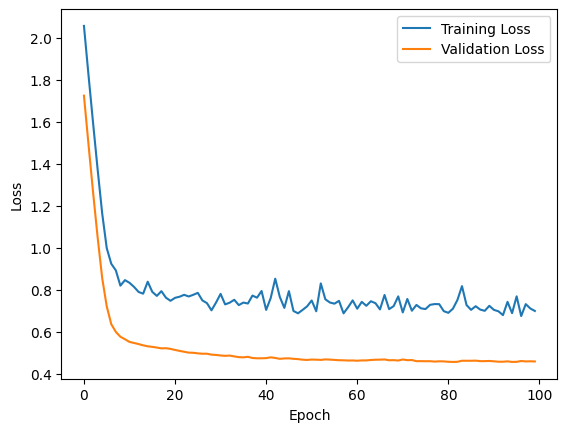

In [50]:
# Plot training and validation loss based on best dropout rate
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**- hyperparameter tuning: Grid Search**

In [51]:
from scikeras.wrappers import KerasRegressor

In [52]:
# Define the LSTM model
def create_lstm_model(optimizer='adam'):
    units = 50
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mse')
    return model

# Create the KerasRegressor wrapper for use in scikit-learn
lstm_model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)

# Define the hyperparameters grid
param_grid = {
    'optimizer': ['adam']
}

# Create the grid search
grid_search = GridSearchCV(estimator=lstm_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_result = grid_search.fit(X_train_reshaped, Y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................optimizer=adam; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[CV] END .....................................optimizer=adam; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in 

[CV] END .....................................optimizer=adam; total time=   8.9s


In [53]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.662802 using {'optimizer': 'adam'}
-0.662802 (0.065888) with: {'optimizer': 'adam'}


In [54]:
# Get the best parameters
best_params = grid_result.best_params_

# Create a new LSTM model with the best parameters
best_lstm_model = create_lstm_model(optimizer=best_params['optimizer'])

# Train the model on the entire training set
history = best_lstm_model.fit(X_train_reshaped, Y_train, epochs=100, batch_size=32, validation_data=(X_val_reshaped, Y_val), verbose=0)

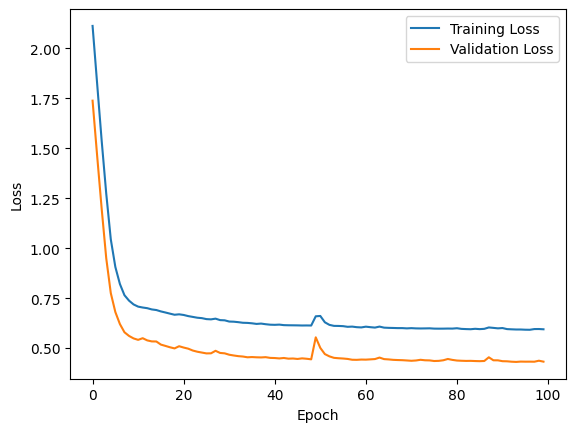

In [55]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
# Evaluate the best model on the test set
best_model = model_0_2 if mse_0_2 < mse_0_3 else model_0_3
loss = best_model.evaluate(X_test_reshaped, Y_test)
print('Test Loss with best dropout rate:', loss)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8663 
Test Loss with best dropout rate: 0.8027443885803223


In [57]:
# Save the best model to a file
best_model.save('best_lstm_model.keras')

In [58]:
# Make predictions with the best model
predictions = best_model.predict(X_test_reshaped)
test_mape = mean_absolute_percentage_error(Y_test.values, predictions.flatten())
test_mape
print(f'Test MAPE: {test_mape:.2f}%')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Test MAPE: 32.40%


<ipython-input-47-11128d0c2f58>:17: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((y_true - y_pred) / y_true)


In [59]:
# Calculate evaluation metrics for the loaded model
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
mape = mean_absolute_percentage_error(Y_test.values, predictions.flatten())

# Print the evaluation metrics
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')

Mean Absolute Error: 0.5791
Mean Squared Error: 0.8027
Mean Absolute Percentage Error: 32.40%


<ipython-input-47-11128d0c2f58>:17: RuntimeWarning: divide by zero encountered in divide
  absolute_percentage_error = np.abs((y_true - y_pred) / y_true)


**10) PREDICTIONS**

In [60]:
# Function to split the sequences into samples with multi-steps
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, Y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        if out_end_ix > len(sequences):
            break
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix:out_end_ix]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)

# Define look_back period
look_back = 12
n_steps_in = 12
n_steps_out = 12

# Create windowed dataset
X_windowed, Y_windowed = split_sequences(X_train, n_steps_in, n_steps_out)

In [61]:
# Prepare fitted values for the training data
fitted_values = np.full(len(grouped_data), np.nan)
fitted_values[look_back:len(Y_train) + look_back] = best_model.predict(X_train_reshaped).flatten()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [62]:
# Prepare forecast values for the test data
forecast_values = np.full(len(grouped_data), np.nan)
forecast_values[len(Y_train) + look_back:len(Y_train) + look_back + len(predictions)] = predictions.flatten()

In [63]:
# Correct the date range to match the data length
date_range = pd.date_range(start=data.index.min(), periods=len(grouped_data), freq='D')

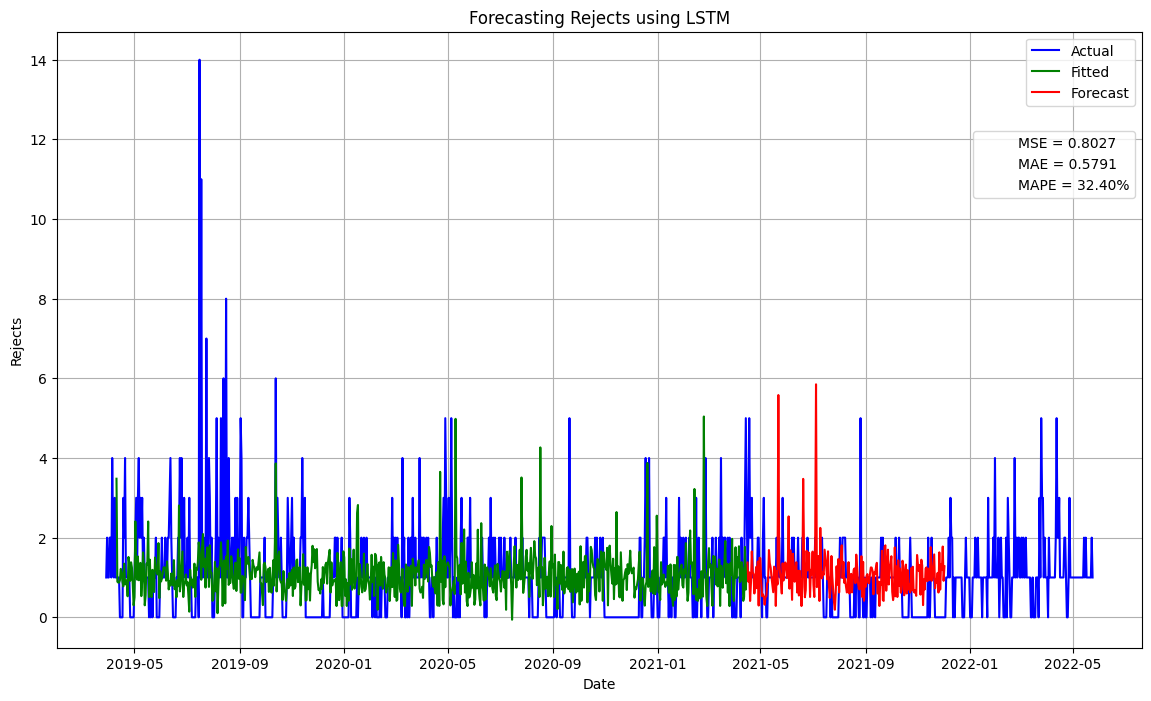

In [64]:
# Plot actual, fitted, and forecasted values
plt.figure(figsize=(14, 8))
plt.plot(date_range,grouped_data['Reject'], label='Actual', color='blue')
plt.plot(date_range[:look_back + len(Y_train)], fitted_values[:look_back + len(Y_train)], label='Fitted', color='green')
plt.plot(date_range[look_back + len(Y_train):look_back + len(Y_train) + len(predictions)], forecast_values[look_back + len(Y_train):look_back + len(Y_train) + len(predictions)], label='Forecast', color='red')
plt.title('Forecasting Rejects using LSTM')
plt.xlabel('Date')
plt.ylabel('Rejects')

# Add the original legend
original_legend = plt.legend(loc='upper right')

# Create a custom legend for the metrics and place it below the original legend
custom_lines = [plt.Line2D([0], [0], color='none', label=f'MSE = {mse:.4f}'),
                plt.Line2D([0], [0], color='none', label=f'MAE = {mae:.4f}'),
                plt.Line2D([0], [0], color='none', label=f'MAPE = {mape:.2f}%')]

metrics_legend = plt.legend(handles=custom_lines, loc='upper right', bbox_to_anchor=(1, 0.85))

plt.gca().add_artist(original_legend)

plt.grid(True)
plt.show()

In [66]:
# Create a DataFrame to store actual, fitted, forecasted values, and ModelID
results_df = pd.DataFrame({
    'Date': date_range,
    'Actual': grouped_data['Reject'].values,
    'Fitted': fitted_values,
    'Forecast': forecast_values,
    'ModelID': grouped_data['ModelID'].values
})
results_df

,Date,Actual,Fitted,Forecast,ModelID
0,2019-03-29,1,NaN,NaN,1
1,2019-03-30,2,NaN,NaN,1
2,2019-03-31,1,NaN,NaN,1
3,2019-04-01,1,NaN,NaN,1
4,2019-04-02,2,NaN,NaN,1
...,...,...,...,...,...
1148,2022-05-20,1,NaN,NaN,2
1149,2022-05-21,1,NaN,NaN,2
1150,2022-05-22,1,NaN,NaN,2
1151,2022-05-23,2,NaN,NaN,2


In [67]:
# Save the DataFrame to a CSV file
results_df.to_csv('forecast_results.csv', index=False)